# 1) Load Breast Cancer Dataset

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from numpy import array
from sys import getsizeof
import os
import cv2

In [3]:
od.download("https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset")
# Copy and paste the following to load the datasets
# Kaggle username: ishitchoudhary
# Kaggle Key: 4f592f5cbf329af64cc4680ebc7cdd42

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ishitchoudhary
Your Kaggle Key: ··········


100%|██████████| 195M/195M [00:09<00:00, 22.0MB/s]


# 2) Apply LBP and PCA

Making Directories 

In [4]:
import os
try:
    os.mkdir('/content/b')
except:
    print('Error 1')
try:
    os.mkdir('/content/m')
except:
    print('Error 12')
try:
    os.mkdir('/content/n')
except:
    print('Error 13')

b = '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign'
for filename in os.listdir(b):
    if 'mask' in filename:
        original_image = cv2.imread(os.path.join(b,filename))
        writepath = os.path.join('/content/b',filename)
        cv2.imwrite(writepath,original_image)

m = '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant'
for filename in os.listdir(m):
    if 'mask' in filename:
        original_image = cv2.imread(os.path.join(m,filename))
        writepath = os.path.join('/content/m',filename)
        cv2.imwrite(writepath,original_image)

n = '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal'
for filename in os.listdir(n):
    if 'mask' in filename:
        original_image = cv2.imread(os.path.join(n,filename))
        writepath = os.path.join('/content/n',filename)
        cv2.imwrite(writepath,original_image)

Applying LBP in new directories

In [5]:
def get_pixel(img, center, x, y):  
    new_value = 0 
    try:
        # If local neighbourhood pixel value is greater than or equal
        # to center pixel values then set it to 1
        if img[x][y] >= center:
            new_value = 1         
    except:
        # Exception is required when neighbourhood value of a center
        # pixel value is null i.e. valuespresent at boundaries.
        pass
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]    
    return val
   
# Applying LBP on all mask images
for filename in os.listdir(b):
    if 'mask'in filename:
        img_bgr = cv2.imread(os.path.join(b,filename),1)
        height, width, _ = img_bgr.shape
        img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
        img_lbp = np.zeros((height, width),np.uint8)
        for i in range(0, height):
            for j in range(0, width):
                img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
        write_path = os.path.join(b,filename)
        cv2.imwrite(write_path,img_lbp)

for filename in os.listdir(m):
    if 'mask'in filename:
        img_bgr = cv2.imread(os.path.join(m,filename),1)
        height, width, _ = img_bgr.shape
        img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
        img_lbp = np.zeros((height, width),np.uint8)
        for i in range(0, height):
            for j in range(0, width):
                img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
        write_path = os.path.join(m,filename)
        cv2.imwrite(write_path,img_lbp)

for filename in os.listdir(n):
    if 'mask'in filename:
        img_bgr = cv2.imread(os.path.join(n,filename),1)
        height, width, _ = img_bgr.shape
        img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
        img_lbp = np.zeros((height, width),np.uint8)
        for i in range(0, height):
            for j in range(0, width):
                img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
        write_path = os.path.join(n,filename)
        cv2.imwrite(write_path,img_lbp)

Applying PCA

In [20]:
from sklearn.decomposition import PCA
try:
    os.mkdir('/content/pca3')
except:
    print('Error 13')

count_b = 0
count_m = 0
count_n = 0

for filename in os.listdir(b):
    if 'mask'in filename:
        try:
            new_image = cv2.imread(os.path.join(b,filename),0)
            new_image = cv2.resize(new_image,(240,240))
            pca = PCA(200).fit(new_image) 
            img_transformed = pca.transform(new_image)
            write_path = os.path.join('/content/pca3','AAAA'+filename)
            cv2.imwrite(write_path,img_transformed)
            count_b += 1
        except:
            pass


In [21]:
for filename in os.listdir(m):
    if 'mask'in filename:
        try:
            new_image = cv2.imread(os.path.join(m,filename),0)
            new_image = cv2.resize(new_image,(240,240))
            pca = PCA(200).fit(new_image) 
            img_transformed = pca.transform(new_image)
            write_path = os.path.join('/content/pca3','BBBB'+filename)
            cv2.imwrite(write_path,img_transformed)
            count_m += 1
        except:
            pass

In [22]:
for filename in os.listdir(n):
    if 'mask'in filename:
        try:
            new_image = cv2.imread(os.path.join(n,filename),0)
            new_image = cv2.resize(new_image,(240,240))
            pca = PCA(200).fit(new_image) 
            img_transformed = pca.transform(new_image)
            write_path = os.path.join('/content/pca3','CCCC'+filename)
            cv2.imwrite(write_path,img_transformed)
            count_n += 1
        except:
            pass

# 3) Applying Models 4) Performance Matrix


In [23]:
# Creating Dataset
def get_image(file_path):
    img = Image.open(file_path)
    return np.array(img)

def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    return color_features

def create_feature_matrix(dir):
    features_list = []
    
    for filename in os.listdir(dir):
        # load image
        img = get_image(os.path.join(dir,filename))
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix('/content/pca3')

In [24]:
# Creating a Labels list
lst1 = ['benign' for i in range(count_b)]
lst2 = ['malignant' for i in range(count_m)]
lst3 = ['normal' for i in range(count_n)]
label = []
label.extend(lst1)
label.extend(lst2)
label.extend(lst3)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

X = pd.DataFrame(feature_matrix)
y = pd.Series(label)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

benign       311
malignant    146
normal       100
dtype: int64

## Applying SVM (SVC)

In [26]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)
# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [29]:
# generate predictions
y_pred = svm.predict(X_test)
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [31]:
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.7225941422594142


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

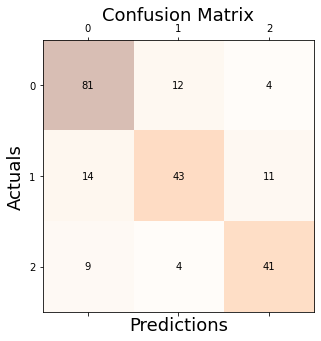

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
        plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [41]:
f1_score = f1_score(y_test, y_pred,average='weighted')

In [45]:
print(f1_score)

0.723882362869203


In [46]:
# Manually calculating type 1 and type 2 error from confusion matrix
print('Type 1 Error',(15/219))
print('Type 2 Error',(13/219))

Type 1 Error 0.0684931506849315
Type 2 Error 0.0593607305936073


In [53]:
# Storing Results for comparision later
svc_t1e = (15/219)
svc_t2e = (13/219)
svc_f1s = f1_score
svc_acc = accuracy

## Applying Xg Boost

In [47]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

In [49]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, missing=1, early_stopping_rounds=10, eval_metric=['merror','mlogloss'], seed=42)

In [52]:
xgb_clf.fit(X_train, y_train,verbose=1, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-merror:0.312388	validation_0-mlogloss:1.06186	validation_1-merror:0.481172	validation_1-mlogloss:1.07797
[1]	validation_0-merror:0.308797	validation_0-mlogloss:1.02948	validation_1-merror:0.451883	validation_1-mlogloss:1.06147
[2]	validation_0-merror:0.298025	validation_0-mlogloss:1.00044	validation_1-merror:0.460251	validation_1-mlogloss:1.04756
[3]	validation_0-merror:0.29982	validation_0-mlogloss:0.97416	validation_1-merror:0.443515	validation_1-mlogloss:1.03711
[4]	validation_0-merror:0.29982	validation_0-mlogloss:0.950374	validation_1-merror:0.456067	validation_1-mlogloss:1.02692
[5]	validation_0-merror:0.292639	validation_0-mlogloss:0.928383	validation_1-merror:0.456067	validation_1-mlogloss:1.01982
[6]	validation_0-merror:0.294434	validation_0-mlogloss:0.908159	validation_1-merror:0.456067	validation_1-mlogloss:1.01317
[7]	validation_0-merror:0.29623	validation_0-mlogloss:0.89105	validation_1-merror:0.451883	validation_1-mlogloss:1.00611
[8]	validation_0-merror:

XGBClassifier(early_stopping_rounds=10, eval_metric=['merror', 'mlogloss'],
              missing=1, num_class=3, objective='multi:softprob', seed=42)

In [54]:
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

In [56]:
y_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1s = f1_score(y_test, y_pred, average='weighted')

In [58]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [60]:
print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix)
print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(xgb_acc))
print('Weighted F1-score: {:.2f}'.format(xgb_f1s))


------------------ Confusion Matrix -----------------

[[82  9  6]
 [13 46 12]
 [ 7  4 39]]

-------------------- Key Metrics --------------------

Accuracy: 0.76
Weighted F1-score: 0.68


## ANN with back-propogation

In [ ]:
import numpy as np
class NeuralNetwork:
	def __init__(self, layers, alpha=0.1):
		# initialize the list of weights matrices, then store the
		# network architecture and learning rate
		self.W = []
		self.layers = layers
		self.alpha = alpha
        		# start looping from the index of the first layer but
		# stop before we reach the last two layers
		for i in np.arange(0, len(layers) - 2):
			# randomly initialize a weight matrix connecting the
			# number of nodes in each respective layer together,
			# adding an extra node for the bias
			w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
			self.W.append(w / np.sqrt(layers[i]))
        # the last two layers are a special case where the input
		# connections need a bias term but the output does not
		w = np.random.randn(layers[-2] + 1, layers[-1])
		self.W.append(w / np.sqrt(layers[-2]))
  
    def __repr__(self):
		# construct and return a string that represents the network
		# architecture
		return "NeuralNetwork: {}".format(
			"-".join(str(l) for l in self.layers))


# 6) Comparing Results from different models

In [76]:
compare_result = [['SVM Classifier',svc_acc,svc_f1s],['XGBoost',xgb_acc,xgb_f1s],['ANN with Back Propogation',0,0]]
df = pd.DataFrame(compare_result,columns=['Model Name','Accuracy','Weighted F1 Scores'])

In [77]:
df.head()

,Model Name,Accuracy,Weighted F1 Scores
0,SVM Classifier,0.722594,0.723882
1,XGBoost,0.760669,0.683084
2,ANN with Back Propogation,0.000000,0.000000
